In [ ]:
# Software Name : HSLinUCB
# SPDX-FileCopyrightText: Copyright (c) 2021 Orange
# SPDX-License-Identifier: GPL-2.0
#
# This software is distributed under the GNU General Public License v2.0 license
#
# Author: David DELANDE <david.delande@orange.com> et al.

In [1]:
import time
import json
import numpy as np
import math
from math import *
import scipy.stats as stats
from numpy.linalg import inv
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import matplotlib
import random
import numpy.linalg
import copy
import pandas as pd
pd.set_option('display.max_columns', None)
from tqdm import trange
plt.rcParams.update({'figure.max_open_warning': 0})
import sys
np.set_printoptions(threshold=sys.maxsize)
np.random.seed(1)
from scipy import stats
import seaborn as sns
import pickle
from collections import deque , OrderedDict
from numpy import asarray
from numpy import save


## Display Algorithms graphs on real environment

cold-start hslinucb experiments number: 10
cold-start dqn experiments number: 10
hot-start dqn experiments number: 10
threshold experiments number: 10
mean latency cold-start hslinucb: 285.2724388322368  +/- 6.550519958410263
mean latency cold-start dqn: 428.0427362006578  +/- 15.89877864260205
mean latency hot-start dqn: 237.1831808826754  +/- 6.951350659423271
mean latency threshold: 279.4909431414473  +/- 7.451033373626301
mean cold-start hslinucb latency errors:  4.4  +/- 0.4958451371144018
mean cold-start dqn latency errors:  108.8 +/- 6.895189743582115
mean hot-start dqn latency errors:  1.1 +/- 0.5148498810332969
mean threshold latency errors:  31.9 +/- 2.750292784414052
mean container number cold-start hslinucb: 2.558223684210527  +/- 0.07686347025353166
mean container number cold-start dqn: 2.3882675438596497  +/- 0.07064910558484724
mean container number hot-start dqn: 2.9991228070175437  +/- 0.0573054357262287
mean container number threshold: 2.6089912280701757  +/- 0.086437

<IPython.core.display.Javascript object>


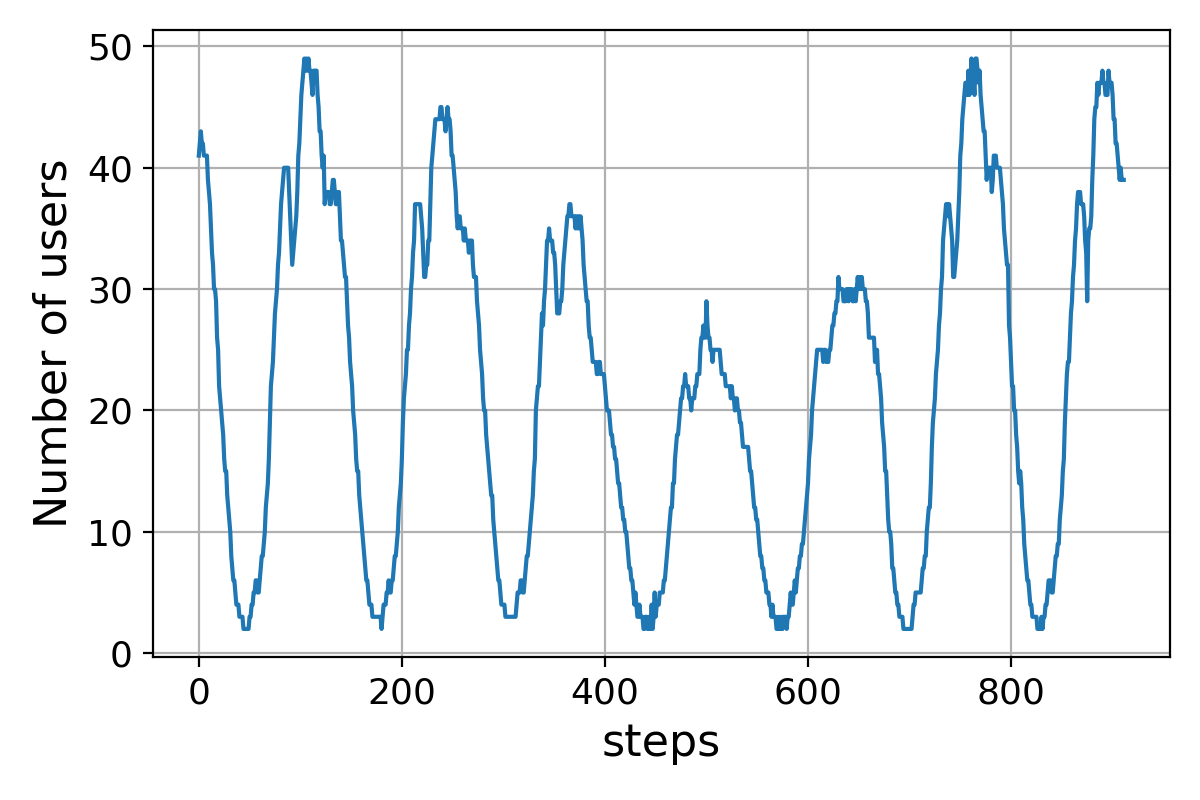

<IPython.core.display.Javascript object>


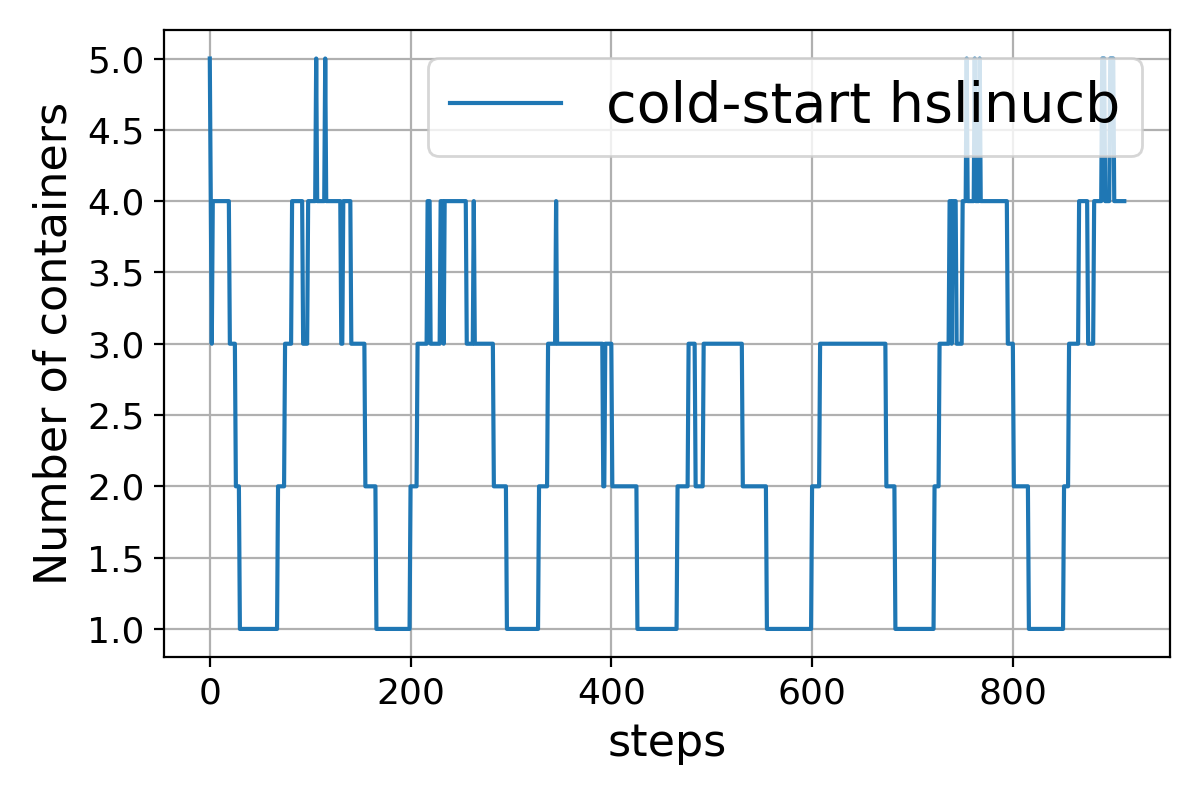

<IPython.core.display.Javascript object>


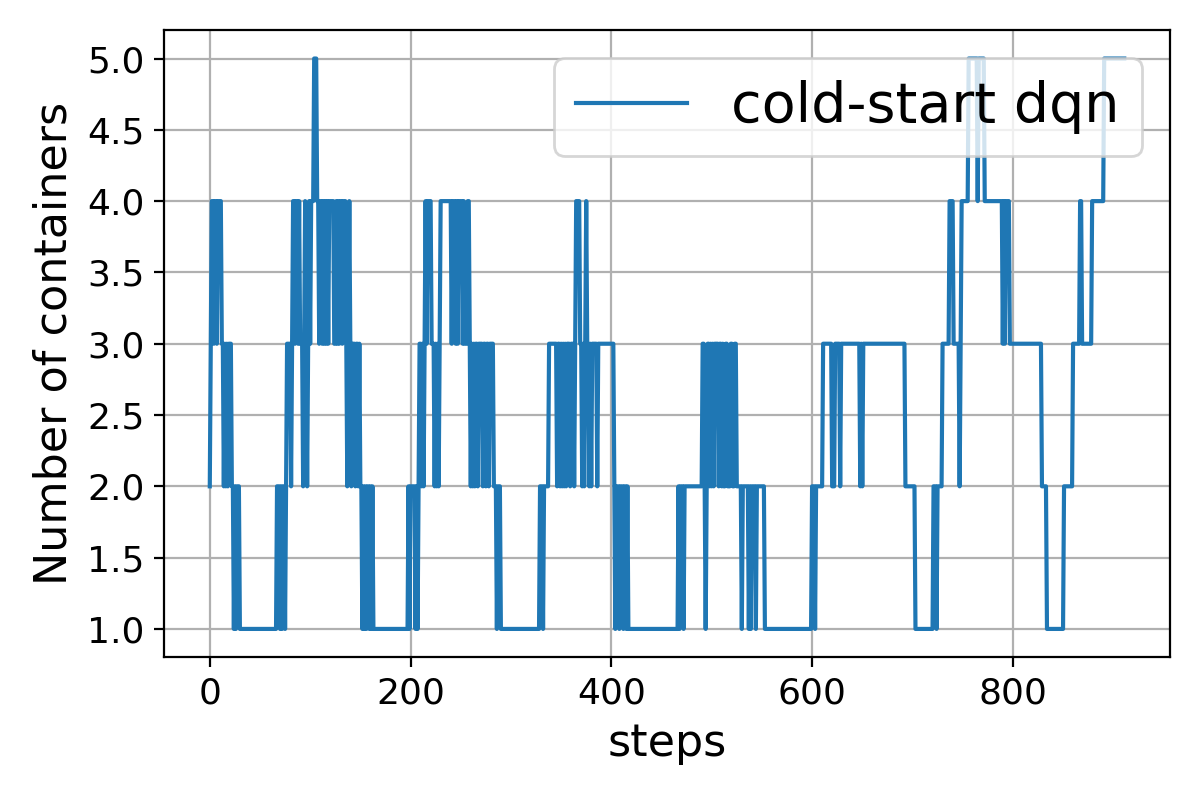

<IPython.core.display.Javascript object>


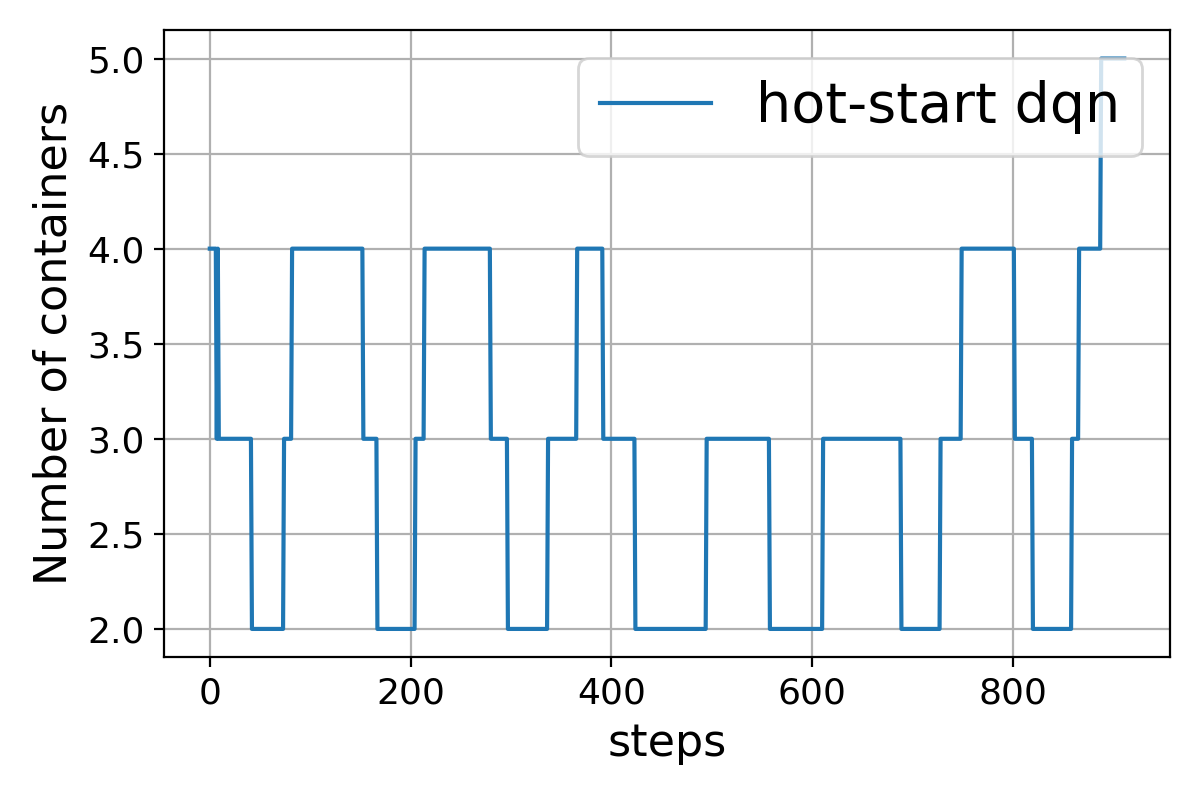

<IPython.core.display.Javascript object>


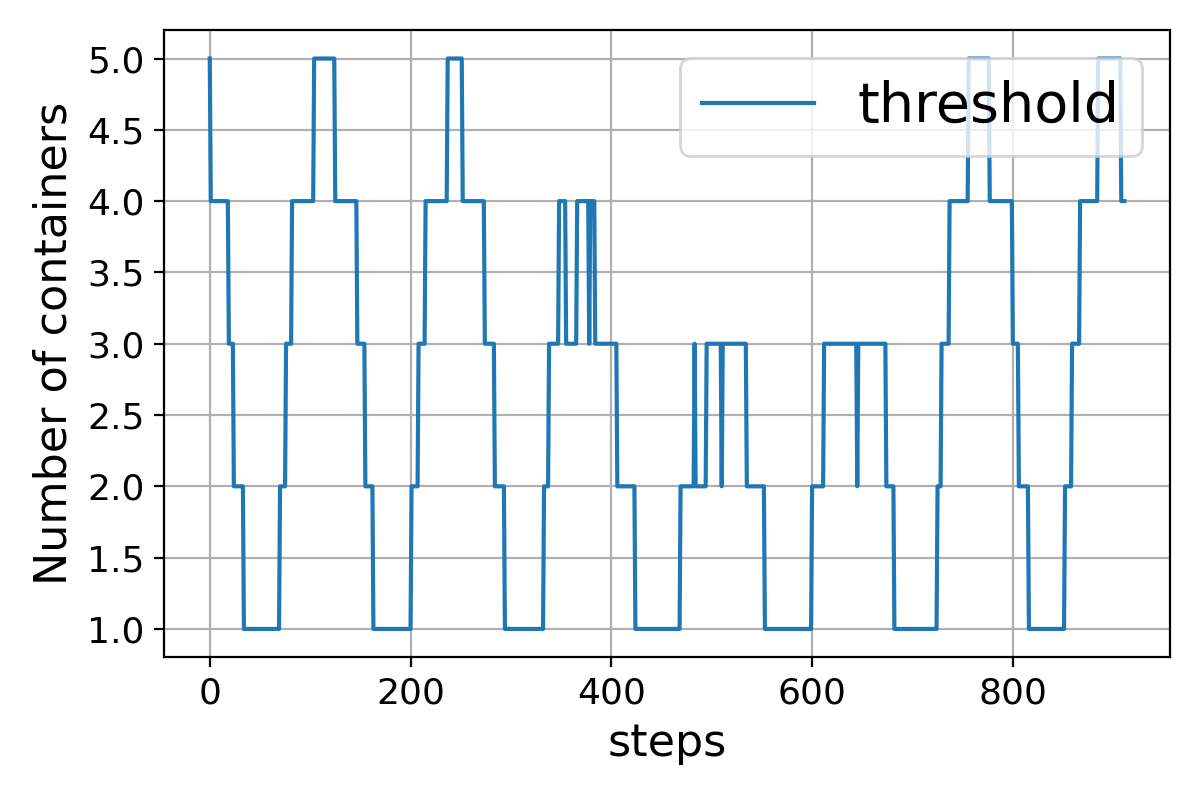

<IPython.core.display.Javascript object>


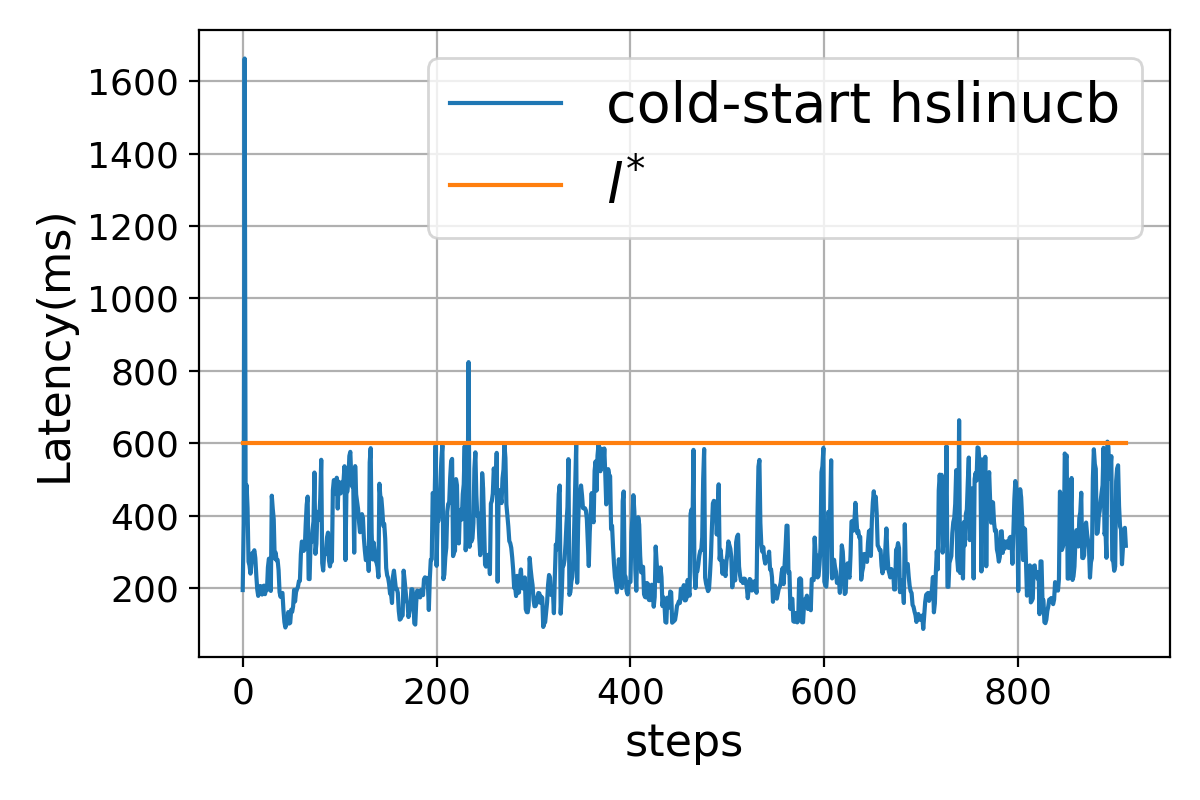

<IPython.core.display.Javascript object>


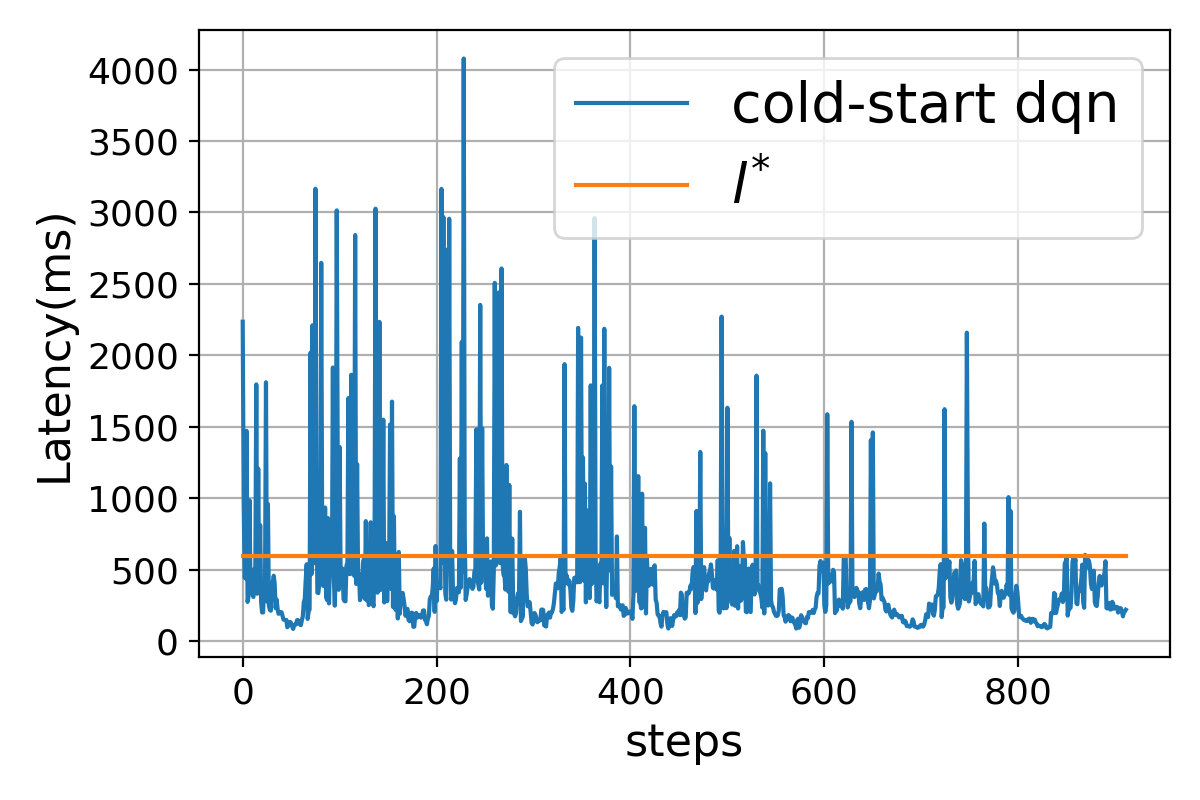

<IPython.core.display.Javascript object>


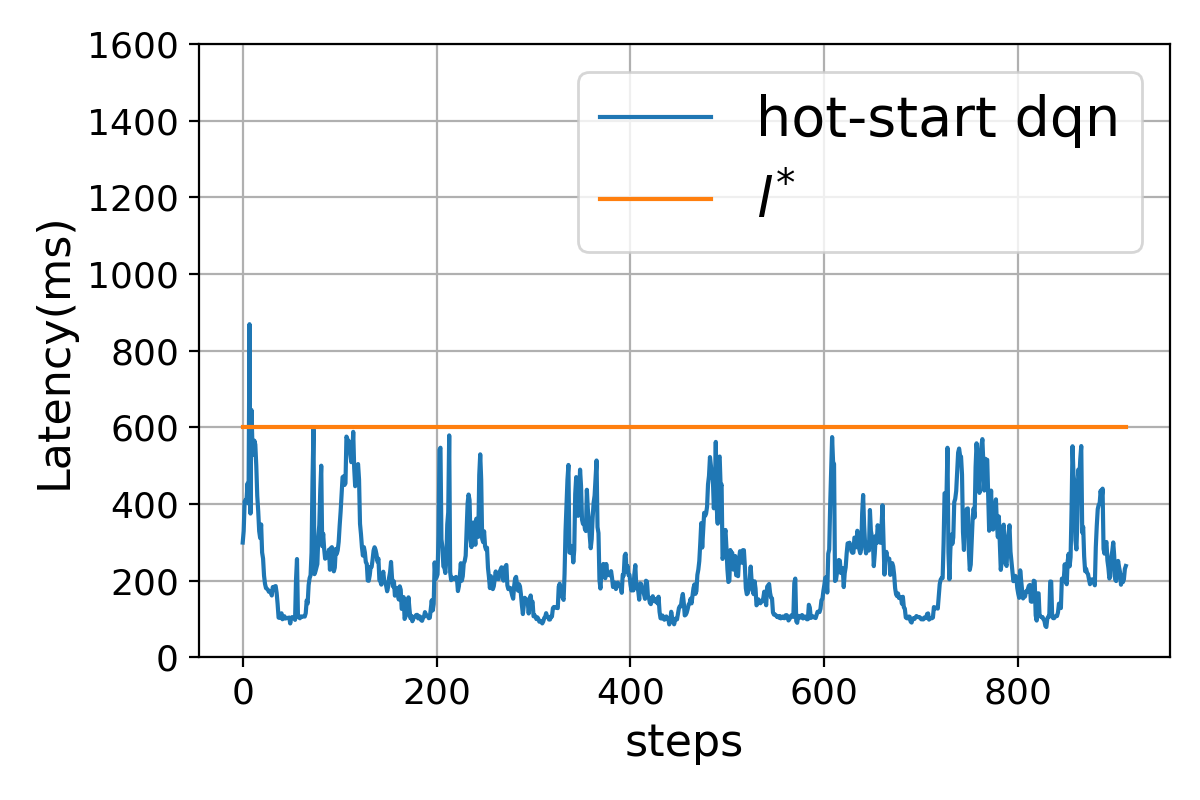

<IPython.core.display.Javascript object>


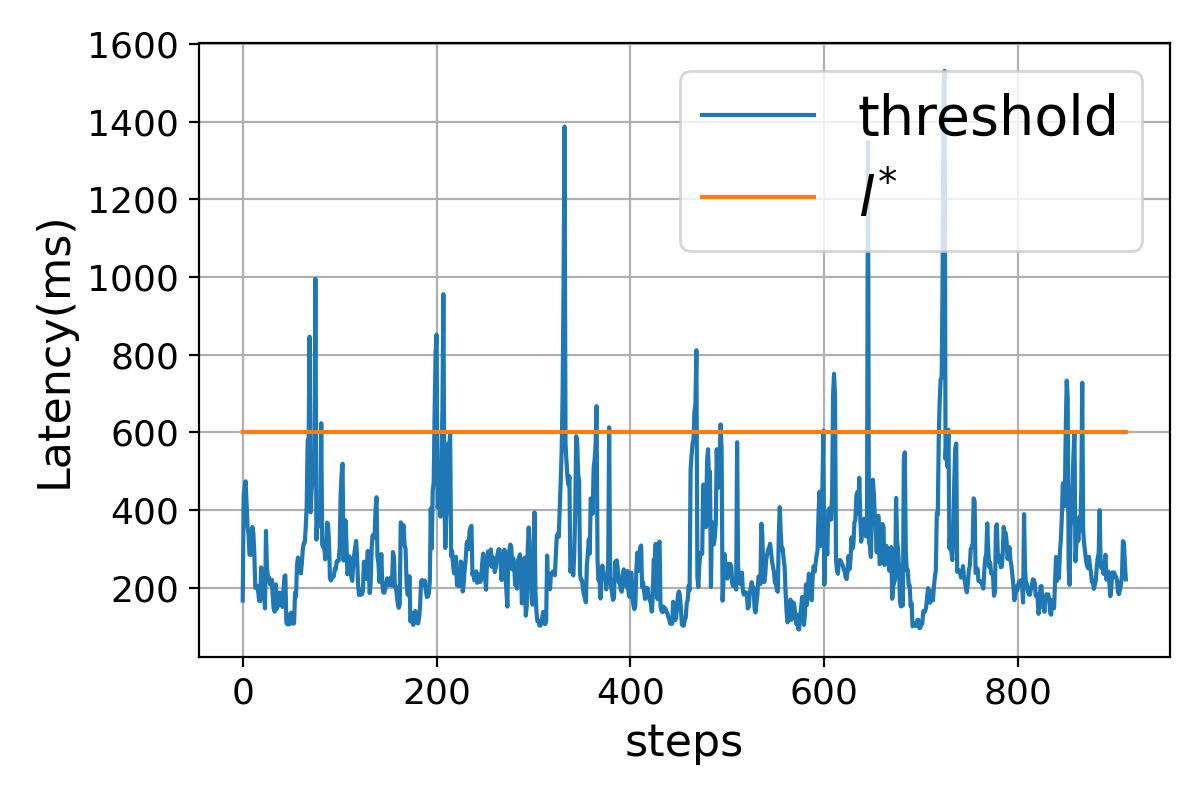

In [2]:
with open("hslinucb_injector_level.bin", 'rb') as f:
    injector_level_learn = np.load(f)
with open("hslinucb_latency_reference.bin", 'rb') as f:
    latency_reference_learn = np.load(f)
with open("hslinucb_environment_level.bin", 'rb') as f:
    environment_level_learn_hslinucb = np.load(f)
with open("hslinucb_latency.bin", 'rb') as f:
    latency_learn_hslinucb = np.load(f)
with open("hslinucb_cpureq_usage.bin", 'rb') as f:
    cpureq_learn_hslinucb = np.load(f)
with open("hslinucb_cpulim_usage.bin", 'rb') as f:
    cpulim_learn_hslinucb = np.load(f)
with open("hslinucb_ramreq_usage.bin", 'rb') as f:
    ramreq_learn_hslinucb = np.load(f)
with open("hslinucb_ramlim_usage.bin", 'rb') as f:
    ramlim_learn_hslinucb = np.load(f)

with open("deepqlearning_environment_level.bin", 'rb') as f:
    environment_level_learn_dqn = np.load(f)
with open("deepqlearning_latency.bin", 'rb') as f:
    latency_learn_dqn = np.load(f)
with open("deepqlearning_cpureq_usage.bin", 'rb') as f:
    cpureq_learn_dqn = np.load(f)
with open("deepqlearning_cpulim_usage.bin", 'rb') as f:
    cpulim_learn_dqn = np.load(f)
with open("deepqlearning_ramreq_usage.bin", 'rb') as f:
    ramreq_learn_dqn = np.load(f)
with open("deepqlearning_ramlim_usage.bin", 'rb') as f:
    ramlim_learn_dqn = np.load(f)


with open("deepqlearning_environment_level_hotstart.bin", 'rb') as f:
    environment_level_learn_dqn_hot = np.load(f)
with open("deepqlearning_latency_hotstart.bin", 'rb') as f:
    latency_learn_dqn_hot = np.load(f)
with open("deepqlearning_cpureq_usage_hotstart.bin", 'rb') as f:
    cpureq_learn_dqn_hot = np.load(f)
with open("deepqlearning_cpulim_usage_hotstart.bin", 'rb') as f:
    cpulim_learn_dqn_hot = np.load(f)
with open("deepqlearning_ramreq_usage_hotstart.bin", 'rb') as f:
    ramreq_learn_dqn_hot = np.load(f)
with open("deepqlearning_ramlim_usage_hotstart.bin", 'rb') as f:
    ramlim_learn_dqn_hot = np.load(f)

with open("hpa_environment_level.bin", 'rb') as f:
    environment_level_learn_threshold = np.load(f)
with open("hpa_latency.bin", 'rb') as f:
    latency_learn_threshold = np.load(f)

latency_ref = 600
print("cold-start hslinucb experiments number:", len(environment_level_learn_hslinucb)) 
print("cold-start dqn experiments number:", len(environment_level_learn_dqn))
print("hot-start dqn experiments number:", len(environment_level_learn_dqn_hot))
print("threshold experiments number:", len(environment_level_learn_threshold))
mean_latency_hslinucb_on_exp = np.mean(latency_learn_hslinucb, axis=0)
std_latency_hslinucb = np.std(mean_latency_hslinucb_on_exp, axis=0) / np.sqrt(len(mean_latency_hslinucb_on_exp))
print("mean latency cold-start hslinucb:", np.mean(mean_latency_hslinucb_on_exp), " +/-", 1.96 * std_latency_hslinucb)
mean_latency_dqn_on_exp = np.mean(latency_learn_dqn, axis=0)
std_latency_dqn = np.std(mean_latency_dqn_on_exp, axis=0) / np.sqrt(len(mean_latency_dqn_on_exp))
print("mean latency cold-start dqn:", np.mean(mean_latency_dqn_on_exp), " +/-", 1.96 * std_latency_dqn)
mean_latency_dqn_hot_on_exp = np.mean(latency_learn_dqn_hot, axis=0)
std_latency_dqn_hot = np.std(mean_latency_dqn_hot_on_exp, axis=0) / np.sqrt(len(mean_latency_dqn_hot_on_exp))
print("mean latency hot-start dqn:", np.mean(mean_latency_dqn_hot_on_exp), " +/-", 1.96 * std_latency_dqn_hot)
mean_latency_threshold_on_exp = np.mean(latency_learn_threshold, axis=0)
std_latency_threshold = np.std(mean_latency_threshold_on_exp, axis=0) / np.sqrt(len(mean_latency_threshold_on_exp))
print("mean latency threshold:", np.mean(mean_latency_threshold_on_exp), " +/-", 1.96 * std_latency_threshold)
latency_errors_hslinucb = []
latency_errors_dqn = []
latency_errors_dqn_hot = []
latency_errors_threshold = []
for i in range(len(latency_learn_hslinucb)):
    latency_error = 0
    for k in range(len(latency_learn_hslinucb[i])):
        if latency_learn_hslinucb[i,k] > latency_ref:
            latency_error +=1
    latency_errors_hslinucb.append(latency_error)

for i in range(len(latency_learn_dqn)):
    latency_error = 0
    for k in range(len(latency_learn_dqn[i])):
        if latency_learn_dqn[i,k] > latency_ref:
            latency_error +=1
    latency_errors_dqn.append(latency_error)

for i in range(len(latency_learn_dqn_hot)):
    latency_error = 0
    for k in range(len(latency_learn_dqn_hot[i])):
        if latency_learn_dqn_hot[i,k] > latency_ref:
            latency_error +=1
    latency_errors_dqn_hot.append(latency_error)

for i in range(len(latency_learn_threshold)):
    latency_error = 0
    for k in range(len(latency_learn_threshold[i])):
        if latency_learn_threshold[i,k] > latency_ref:
            latency_error +=1
    latency_errors_threshold.append(latency_error)

std_latency_error_hslinucb = np.std(latency_errors_hslinucb, axis=0) / np.sqrt(len(latency_errors_hslinucb))
print("mean cold-start hslinucb latency errors: ", np.mean(latency_errors_hslinucb), " +/-", 1.96 * std_latency_error_hslinucb)
std_latency_error_dqn = np.std(latency_errors_dqn, axis=0) / np.sqrt(len(latency_errors_dqn))
print("mean cold-start dqn latency errors: ", np.mean(latency_errors_dqn),"+/-", 1.96 * std_latency_error_dqn)
std_latency_error_dqn_hot = np.std(latency_errors_dqn_hot, axis=0) / np.sqrt(len(latency_errors_dqn_hot))
print("mean hot-start dqn latency errors: ", np.mean(latency_errors_dqn_hot),"+/-", 1.96 * std_latency_error_dqn_hot)
std_latency_error_threshold = np.std(latency_errors_threshold, axis=0) / np.sqrt(len(latency_errors_threshold))
print("mean threshold latency errors: ",np.mean(latency_errors_threshold),"+/-", 1.96 * std_latency_error_threshold)
mean_environment_level_hslinucb_on_exp = np.mean(environment_level_learn_hslinucb, axis=0)
std_environment_level_hslinucb = np.std(mean_environment_level_hslinucb_on_exp, axis=0) / np.sqrt(len(mean_environment_level_hslinucb_on_exp))
print("mean container number cold-start hslinucb:", np.mean(mean_environment_level_hslinucb_on_exp), " +/-", 1.96 * std_environment_level_hslinucb)
mean_environment_level_dqn_on_exp = np.mean(environment_level_learn_dqn, axis=0)
std_environment_level_dqn = np.std(mean_environment_level_dqn_on_exp, axis=0) / np.sqrt(len(mean_environment_level_dqn_on_exp))
print("mean container number cold-start dqn:", np.mean(mean_environment_level_dqn_on_exp), " +/-", 1.96 * std_environment_level_dqn)
mean_environment_level_dqn_hot_on_exp = np.mean(environment_level_learn_dqn_hot, axis=0)
std_environment_level_dqn_hot = np.std(mean_environment_level_dqn_hot_on_exp, axis=0) / np.sqrt(len(mean_environment_level_dqn_hot_on_exp))
print("mean container number hot-start dqn:", np.mean(mean_environment_level_dqn_hot_on_exp), " +/-", 1.96 * std_environment_level_dqn_hot)
mean_environment_level_threshold_on_exp = np.mean(environment_level_learn_threshold, axis=0)
std_environment_level_threshold = np.std(mean_environment_level_threshold_on_exp, axis=0) / np.sqrt(len(mean_environment_level_threshold_on_exp))
print("mean container number threshold:", np.mean(mean_environment_level_threshold_on_exp), " +/-", 1.96 * std_environment_level_threshold)

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Number of users",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
mean_injector_level_learn = np.mean(injector_level_learn, axis=0)
t = np.arange(len(mean_injector_level_learn))
ax.plot(t,mean_injector_level_learn)
ax.grid()
plt.tight_layout()
plt.savefig("PF_full_week_injection_pattern.png")
plt.show()


fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Number of containers",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level_learn))
ax.plot(t,environment_level_learn_hslinucb[0],label="cold-start hslinucb")
ax.grid()
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.savefig("PF_Environment_level_full_week_coldstart_hslinucb.png")
plt.show()

    
fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Number of containers",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level_learn))
ax.plot(t,environment_level_learn_dqn[0],label="cold-start dqn")
ax.grid()
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.savefig("PF_Environment_level_full_week_coldstart_dqn.png")
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Number of containers",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level_learn))
ax.plot(t,environment_level_learn_dqn_hot[4],label="hot-start dqn")
ax.grid()
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.savefig("PF_Environment_level_full_week_hotstart_dqn.png")
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Number of containers",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level_learn))
ax.plot(t,environment_level_learn_threshold[0],label="threshold")
ax.grid()
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.savefig("PF_Environment_level_full_week_coldstart_threshold.png")
plt.show()


fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Latency(ms)",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level_learn))
latency_reference = np.mean(latency_reference_learn, axis=0)
ax.plot(t,latency_learn_hslinucb[0],label="cold-start hslinucb")
ax.plot(t,latency_reference,label=r'$l^{*}$')
ax.grid()
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.savefig("PF_Latency_full_week_coldstart_hslinucb.png")
plt.show()

    
fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Latency(ms)",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level_learn))
ax.plot(t,latency_learn_dqn[0],label="cold-start dqn")
ax.plot(t,latency_reference,label=r'$l^{*}$')
ax.grid()
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.savefig("PF_Latency_full_week_hotstart_dqn.png")
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Latency(ms)",fontsize=16)
plt.ylim(top=1600)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level_learn))
ax.plot(t,latency_learn_dqn_hot[4],label="hot-start dqn")
ax.plot(t,latency_reference,label=r'$l^{*}$')
ax.grid()
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.savefig("PF_Latency_full_week_hotstart_dqn.png")
plt.show()

fig, ax = plt.subplots(figsize=(6, 4), nrows=1, ncols=1)
plt.xlabel('steps',fontsize=16)
plt.ylabel("Latency(ms)",fontsize=16)
plt.xticks(fontsize=13,fontweight='normal')
plt.yticks(fontsize=13,fontweight='normal')
t = np.arange(len(mean_injector_level_learn))
ax.plot(t,latency_learn_threshold[0],label="threshold")
ax.plot(t,latency_reference,label=r'$l^{*}$')
ax.grid()
plt.tight_layout()
plt.legend(loc = 'upper right',prop={'size':20})
plt.savefig("PF_Latency_full_week_coldstart_threshold.png")
plt.show()
